In [58]:
import pandas as pd

df = pd.read_csv(r"D:\toka\depi\project\E-commerce-chatbot\data\BigBasket_Products.csv", index_col=0)
pd.set_option("display.max_rows", 5)

In [59]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27555 entries, 1 to 27555
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27555 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18929 non-null  float64
 8   description   27440 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.1+ MB


In [61]:
# Check duplicates
print(df.duplicated().sum())

354


In [62]:
# Remove duplicates
df = df.drop_duplicates()

In [63]:
# Check unique values
print(df["category"].unique())
print(df["sub_category"].unique())
print(df["brand"].unique())
print(df["type"].unique())


['Beauty & Hygiene' 'Kitchen, Garden & Pets' 'Cleaning & Household'
 'Gourmet & World Food' 'Foodgrains, Oil & Masala'
 'Snacks & Branded Foods' 'Beverages' 'Bakery, Cakes & Dairy' 'Baby Care'
 'Fruits & Vegetables' 'Eggs, Meat & Fish']
['Hair Care' 'Storage & Accessories' 'Pooja Needs' 'Bins & Bathroom Ware'
 'Bath & Hand Wash' 'All Purpose Cleaners' 'Skin Care'
 'Mops, Brushes & Scrubs' 'Cooking & Baking Needs' 'Chocolates & Biscuits'
 'Fresheners & Repellents' 'Snacks, Dry Fruits, Nuts' 'Dairy & Cheese'
 'Pasta, Soup & Noodles' 'Dry Fruits' 'Drinks & Beverages'
 'Kitchen Accessories' 'Flask & Casserole' 'Breakfast Cereals'
 'Frozen Veggies & Snacks' 'Fruit Juices & Drinks' 'Cookies, Rusk & Khari'
 'Fragrances & Deos' 'Tea' 'Masalas & Spices' "Men's Grooming"
 'Chocolates & Candies' 'Steel Utensils' 'Tinned & Processed Food'
 'Organic Staples' 'Sauces, Spreads & Dips' 'Pickles & Chutney'
 'Ready To Cook & Eat' 'Baby Bath & Hygiene' 'Stationery'
 'Pet Food & Accessories' 'Biscuits & C

In [64]:
missing_values = df.isnull().sum()

# show all rows
pd.set_option('display.max_rows', None)

print(missing_values)

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8463
description      113
dtype: int64


In [65]:
# show the row that has a missing value in 'product' column
missing_rows_of_product = df[df['product'].isnull()]
print(missing_rows_of_product)

      product   category sub_category          brand  sale_price  \
index                                                              
14364     NaN  Beverages       Coffee  Cothas Coffee       200.0   

       market_price           type  rating  \
index                                        
14364         240.0  Ground Coffee     4.2   

                                             description  
index                                                     
14364  Cothas Specialty Blend Coffee and Chicory incl...  


In [66]:
df = df.dropna(subset=['product'])

In [67]:
df['description'] = df['description'].fillna('No description')

In [68]:
df['brand'] = df['brand'].fillna('Unkown')

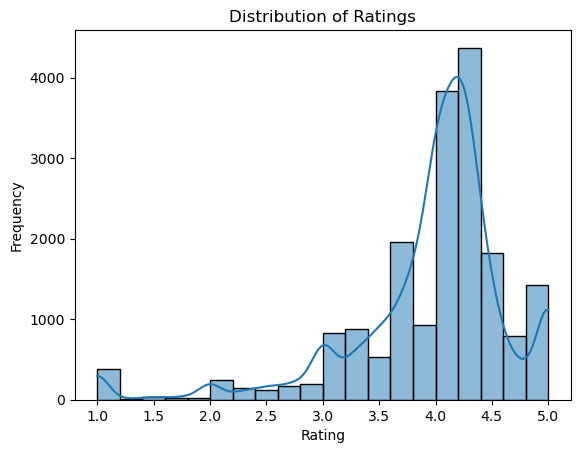

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of ratings to see its distribution
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [70]:
df['rating'].fillna(df['rating'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15528\333645285.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].median(), inplace=True)


In [71]:
missing_values_after = df.isnull().sum()

# show all rows
pd.set_option('display.max_rows', None)

print(missing_values_after)

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64


In [72]:
# Check for rows where market_price is 0
zero_market_price = df[df['market_price'] == 0]

# Display the rows
print(zero_market_price)

# Count how many such rows exist
print(f"Number of products with market_price = 0 : {len(zero_market_price)}")

Empty DataFrame
Columns: [product, category, sub_category, brand, sale_price, market_price, type, rating, description]
Index: []
Number of products with market_price = 0 : 0


In [73]:
# Count rows where sale price is greater than market price
invalid_prices = df[df['sale_price'] > df['market_price']]

# Display the rows (optional)
print(invalid_prices)

# Print the number of such rows
print(f"Number of products where sale price is greater than market price: {len(invalid_prices)}")

Empty DataFrame
Columns: [product, category, sub_category, brand, sale_price, market_price, type, rating, description]
Index: []
Number of products where sale price is greater than market price: 0


In [74]:
# create the Q&A dataset

# List for storing Q&A pairs
qa_pairs = []

# 1. Basic Q&A generation
for _, row in df.iterrows():
    product = row['product']
    category = row['category']
    sub_category = row['sub_category']
    brand = row['brand']
    price = row['sale_price']
    # market_price = row['market_price']
    type = row['type']
    rating = row['rating']
    description = row['description']

    qa_pairs.append((f"What is {product}?", f"{product} is a product in the {sub_category} sub category and in the {category} category. Description: {description}"))
    qa_pairs.append((f"What is the brand of {product}?", f"The brand of {product} is {brand}"))
    qa_pairs.append((f"What is the price of {product}?", f"The price of {product} is {price}"))
    qa_pairs.append((f"What is the type of {product}?", f"The type of {product} is {type}"))
    qa_pairs.append((f"What is the rating of {product}?", f"The rating of {product} is {rating}"))

# 2. Sorting products by category
categories = df['category'].unique()
for category in categories:
    category_products = df[df['category'] == category]

    # Sort by price (ascending)
    sorted_by_price = category_products.sort_values(by='sale_price')
    price_list = ", ".join([f"{row['product']} (${row['sale_price']})" for _, row in sorted_by_price.iterrows()])
    qa_pairs.append((f"Sort products in {category} by price", f"The products in {category} sorted by price are: {price_list}"))

    # Sort by rating (descending)
    sorted_by_rating = category_products.sort_values(by='rating', ascending=False)
    rating_list = ", ".join([f"{row['product']} (Rating: {row['rating']})" for _, row in sorted_by_rating.iterrows()])
    qa_pairs.append((f"Sort products in {category} by rating", f"The products in {category} sorted by rating are: {rating_list}"))

# 3. Discount calculation
for _, row in df.iterrows():
    product = row['product']
    price = row['sale_price']
    market_price = row['market_price']

    if price and market_price:
        discount = round((market_price - price) / market_price * 100, 2)
        qa_pairs.append((f"What is the discount on {product}?", f"The discount on {product} is {discount}%"))

# 4. Adding Q&A for Services
services_qa = [
    ("What are the shipping options?", "We offer standard, express, and same-day delivery options."),
    ("What is the return policy?", "You can return products within 30 days of purchase if they are unused and in original packaging."),
    ("How can I contact customer support?", "You can reach customer support via phone, email, or live chat on our website."),
    ("Do you offer international shipping?", "Currently, we only ship within the country, but international shipping is coming soon."),
    ("What payment methods do you accept?", "We accept credit/debit cards, PayPal, and online banking payments.")
]
qa_pairs.extend(services_qa)          

# Save the Q&A dataset
qa_df = pd.DataFrame(qa_pairs, columns=["question", "answer"])
qa_df.to_csv(r"D:\toka\depi\project\E-commerce-chatbot\data/qna_dataset.csv", index=False)
print(f"Q&A dataset created successfully!")

Q&A dataset created successfully!


In [75]:
qa_df.head()

,question,answer
0,What is Garlic Oil - Vegetarian Capsule 500 mg?,Garlic Oil - Vegetarian Capsule 500 mg is a pr...
1,What is the brand of Garlic Oil - Vegetarian C...,The brand of Garlic Oil - Vegetarian Capsule 5...
2,What is the price of Garlic Oil - Vegetarian C...,The price of Garlic Oil - Vegetarian Capsule 5...
3,What is the type of Garlic Oil - Vegetarian Ca...,The type of Garlic Oil - Vegetarian Capsule 50...
4,What is the rating of Garlic Oil - Vegetarian ...,The rating of Garlic Oil - Vegetarian Capsule ...


In [76]:
qa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163227 entries, 0 to 163226
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   question  163227 non-null  object
 1   answer    163227 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [77]:
print(qa_df.isnull().sum())

question    0
answer      0
dtype: int64


In [78]:
print(qa_df[(qa_df['question'] == '') | (qa_df['answer'] == '')])

Empty DataFrame
Columns: [question, answer]
Index: []
